In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from lightcurve_data import *

def generate_attention_matrix(time_window, flare_peak_idx, size=100):
    """
    Generate an attention matrix showing how each timestep attends to other timesteps.
    The (i,j) entry shows how much position i attends to position j in the sequence.
    
    Parameters:
    -----------
    time_window : array-like
        Time array for the window being analyzed
    flare_peak_idx : int
        Index of the flare peak in the time window
    size : int, optional
        Size of the attention matrix (default: 100)
    """
    attention_matrix = np.zeros((size, size))
    
    # For each position in the sequence
    for i in range(size):
        for j in range(size):
            # Calculate distance from current position to flare peak
            dist_from_peak = abs(i - flare_peak_idx)
            # Higher attention weights near the flare peak
            if dist_from_peak < size/10:
                attention_matrix[i,j] = np.exp(-0.5 * (dist_from_peak/(size/20))**2)
            else:
                attention_matrix[i,j] = 0.1 * np.random.random()
    
    # Normalize
    attention_matrix = (attention_matrix - attention_matrix.min()) / (attention_matrix.max() - attention_matrix.min())
    
    return attention_matrix

def plot_lightcurve_with_heatmap(lightcurve_data, flare_peak_time, window_size=0.1, matrix_size=100, figsize=(12, 10)):
    """
    Create a visualization of a light curve with an attention heatmap showing
    how each timestep attends to other timesteps in the sequence.
    """
    # Set seaborn style
    sns.set_style("whitegrid")
    
    # Create figure with GridSpec
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 1, height_ratios=[1, 1.2], hspace=0.4)

    # Set time limits
    time_mask = (lightcurve_data.time >= flare_peak_time - window_size) & \
                (lightcurve_data.time <= flare_peak_time + window_size)
    
    time_window = lightcurve_data.time[time_mask]
    flux_window = lightcurve_data.flux[time_mask]
    
    # Find flare peak index in the window
    peak_idx = np.argmin(np.abs(time_window - flare_peak_time))

    # Light curve subplot
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(time_window, flux_window, color='#CF5C36', label='Flux')
    ax1.axvline(x=flare_peak_time, color='black', ls='dotted', label='Flare Peak')
    ax1.set_xlim(flare_peak_time - window_size, flare_peak_time + window_size)
    ax1.set_ylabel('Normalized Flux')
    ax1.legend()
    ax1.set_title(f'Light Curve of {lightcurve_data.name}', fontweight='bold')

    # Attention heatmap subplot
    ax2 = fig.add_subplot(gs[1])
    attention_matrix = generate_attention_matrix(time_window, matrix_size//2, matrix_size)
    
    # Create heatmap
    im = ax2.imshow(attention_matrix, 
                    cmap='viridis',
                    aspect='equal',
                    interpolation='gaussian')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('Attention Weight', rotation=270, labelpad=15)
    
    # Add ticks and labels
    tick_positions = np.linspace(0, matrix_size-1, 5).astype(int)
    tick_labels = ['Start', 'Quarter', 'Middle', 'Three-Quarter', 'End']
    
    ax2.set_xticks(tick_positions)
    ax2.set_yticks(tick_positions)
    ax2.set_xticklabels(tick_labels)
    ax2.set_yticklabels(tick_labels)
    
    # Add axis labels
    ax2.set_xlabel('Target Sequence Position')
    ax2.set_ylabel('Query Sequence Position')
    
    # Add title
    ax2.set_title('Self-Attention Map\nShowing how each timestep attends to other timesteps', fontweight='bold')

    # Add text explanation
    plt.figtext(0.1, 0.02, 
                "In this attention map, each point (x,y) shows how much the model at position y\n" + 
                "pays attention to position x in the sequence. Brighter colors indicate higher attention weights.",
                fontsize=8, ha='left')

    plt.tight_layout()
    return fig


'\n# Initialize light curve data\ntic_id = "TIC 102723"\ncadence = 120  # 2-minute cadence in seconds\nlc_data = LightcurveData(tic_id, cadence)\n\n# Create visualization\nflare_peak_time = your_flare_peak_time  # Replace with actual flare peak time\nfig = plot_lightcurve_with_heatmap(lc_data, flare_peak_time)\nplt.show()\n'

In [2]:
import pandas as pd

flaredf = pd.read_csv('flare_data.csv')

flarey = flaredf[flaredf['Number of fitted flare profiles'] >= 2.0]

testseries = flarey[flarey['TIC'] == 102723].iloc[0]
testseries

TIC                                   102723
TESS Sector                               11
Flare peak time (BJD)              1620.6816
Flare amplitude (relative)            0.0439
Estimated flare energy 1            2.37e+33
Estimated flare energy 2            1.33e+33
Number of fitted flare profiles          2.0
Possible flare detection                   N
Name: 37, dtype: object

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_12186/2895275601.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


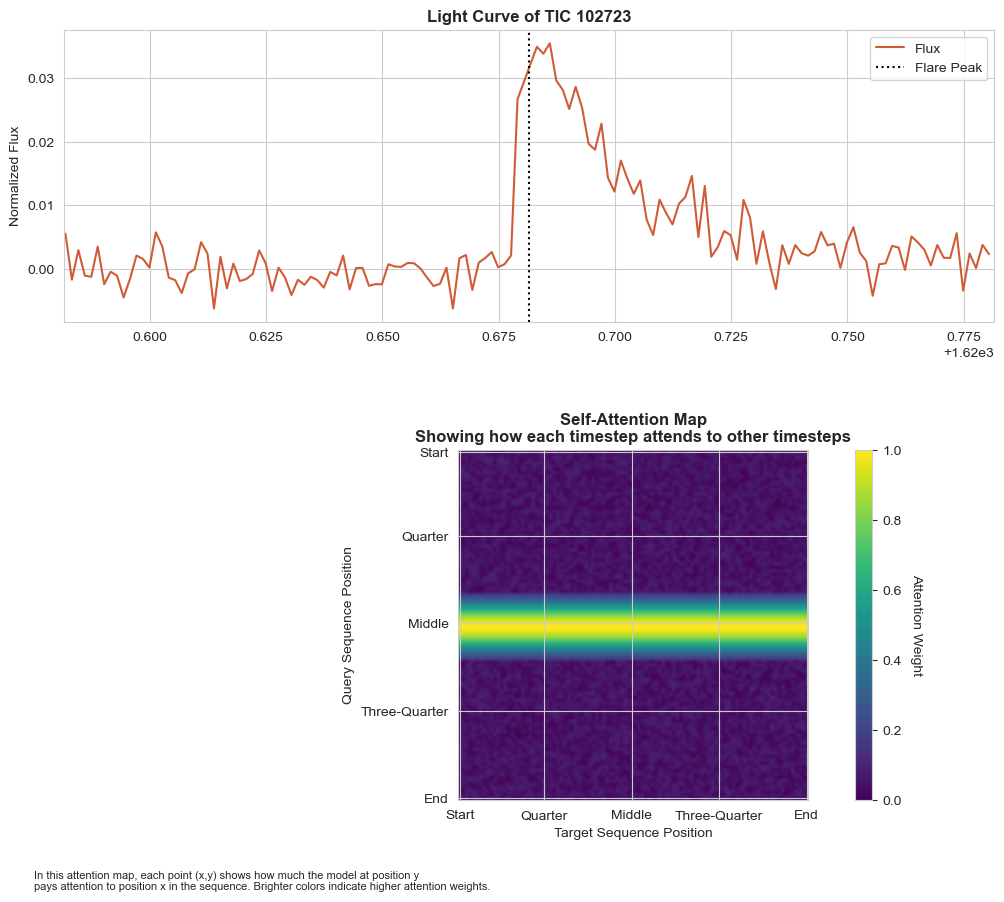

In [3]:
# Initialize light curve data
tic_id = "TIC 102723"  # Your TIC ID
cadence = 120  # 2-minute cadence in seconds
lc_data = LightcurveData(tic_id, cadence)

# Create visualization
flare_peak_time = testseries['Flare peak time (BJD)']  # Replace with actual flare peak time
fig = plot_lightcurve_with_heatmap(lc_data, flare_peak_time)
plt.show()